In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fastai.vision import *
from fastai.datasets import * # untar_data is under the datasets module
from fastai.metrics import error_rate, accuracy

## Introduction

The purpose of this notebook is to try out the image recognition techniques introduced in the first lecture of 'Practical Deep Learning for Coders'. Our dataset will consist of images of Lego's. The dataset was attained from Kaggle: https://www.kaggle.com/joosthazelzet/lego-brick-images

The dataset itself is downloaded with Kaggle's CLI tool. In the data folder one can run the following command to download the dataset: `kaggle datasets download -d joosthazelzet/lego-brick-images
`. 

In [5]:
# The path to the data dir
data_dir_raw = os.path.abspath(
    os.path.join(
        os.getcwd(), '..', '..', 'data', 'raw', 'LEGO brick images'
    )
)
os.path.exists(data_dir_raw)

True

In [12]:
data = (ImageItemList.from_folder(data_dir_raw)
       .split_by_folder()
       .label_from_folder()
       .transform(get_transforms(), size=224)
       .databunch()
       .normalize())

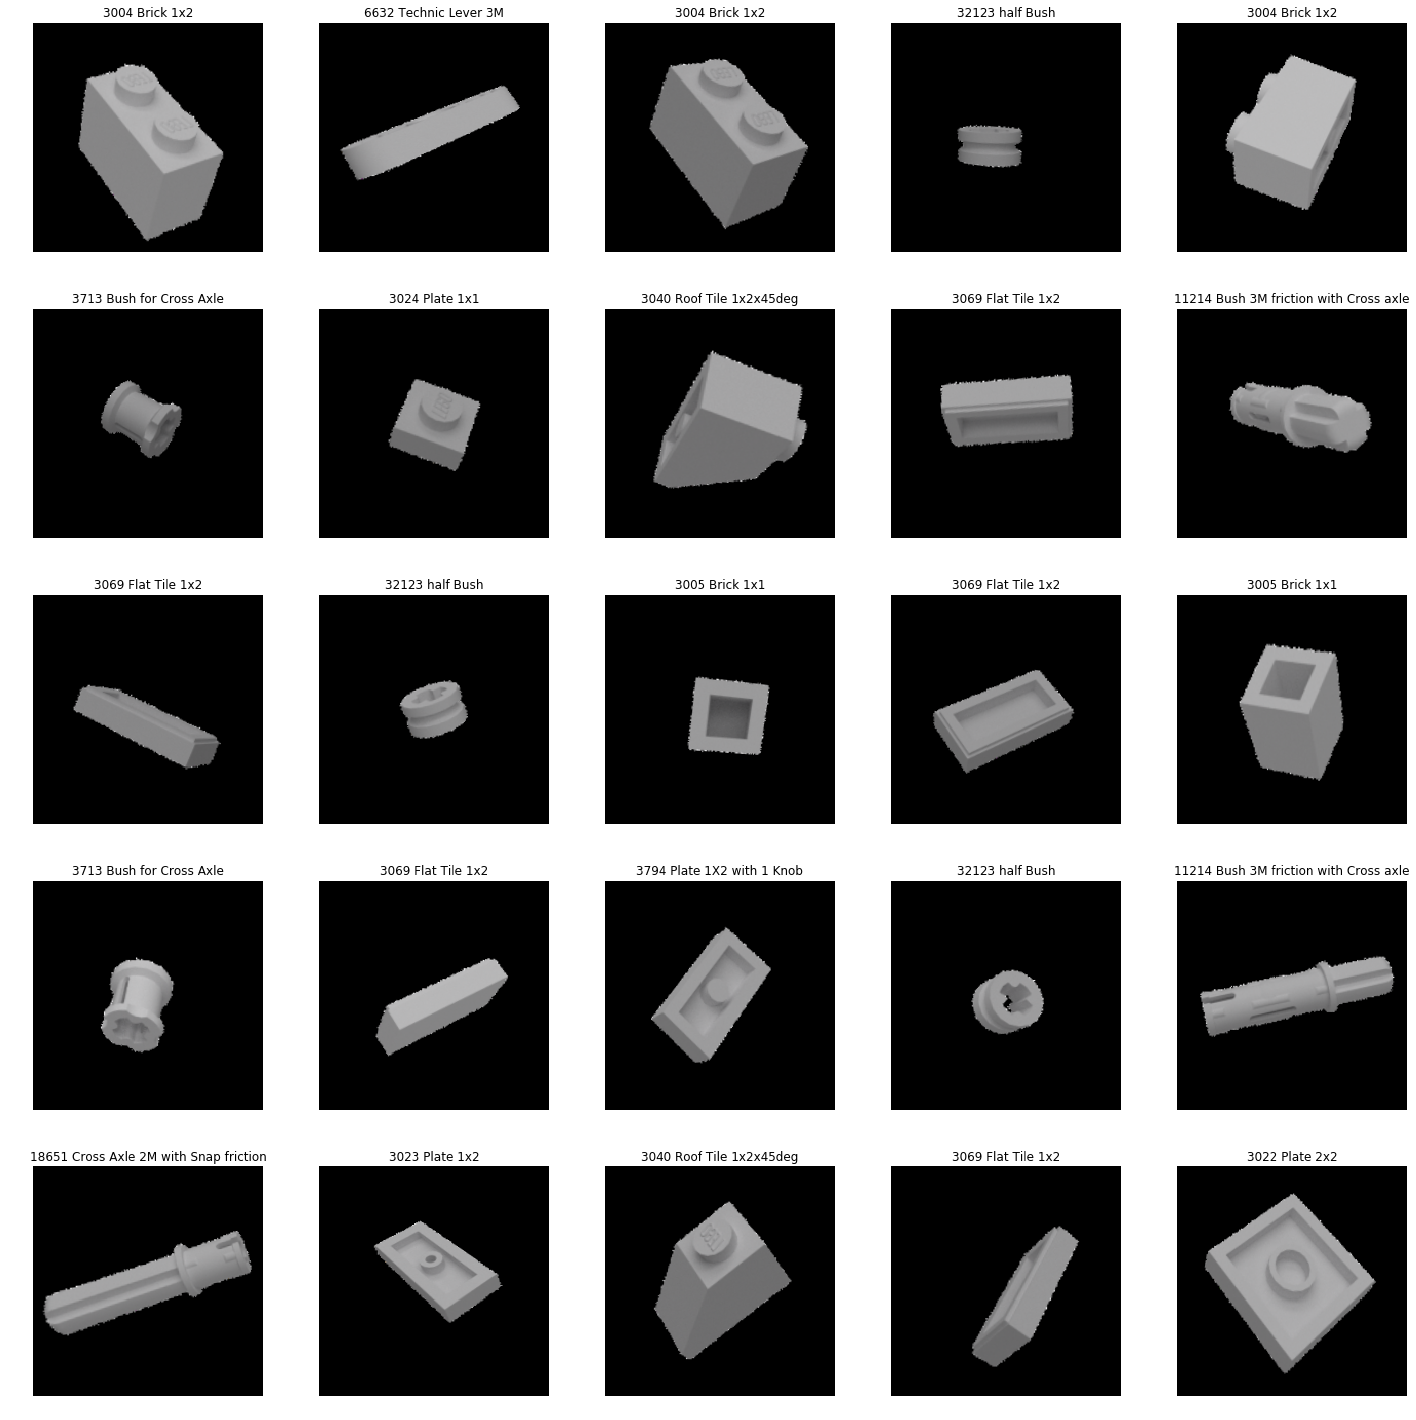

In [13]:
data.show_batch()

## Training: resnet34

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.279706,0.454838,0.160997
2,0.573651,0.205906,0.076187
3,0.380765,0.140067,0.046245
4,0.298956,0.126426,0.043267


In [17]:
learn.save('stage-1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

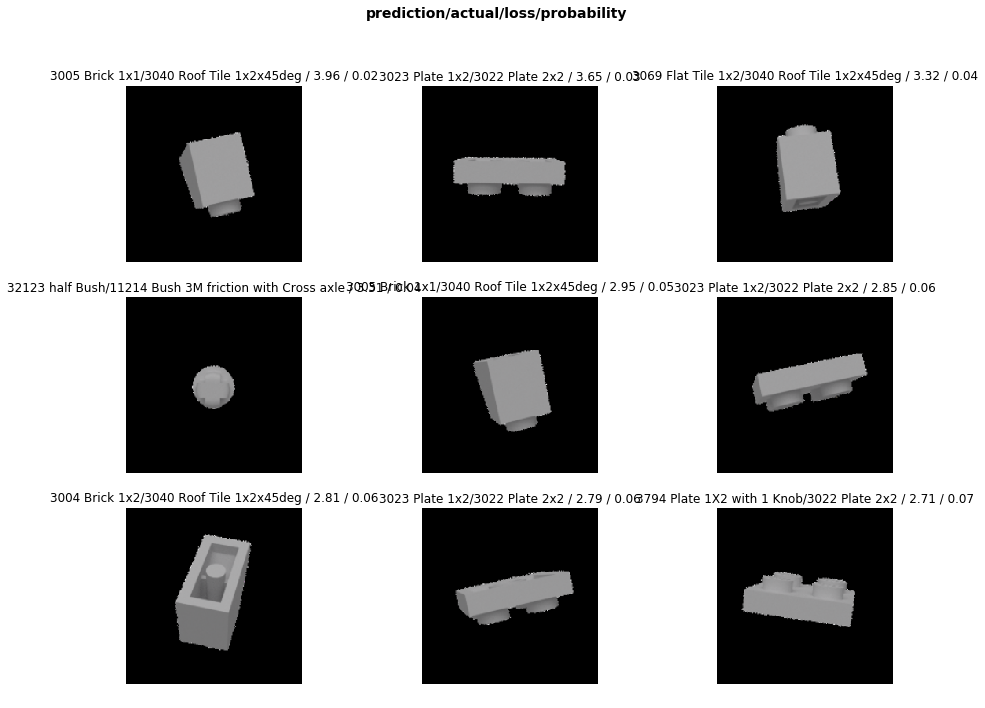

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

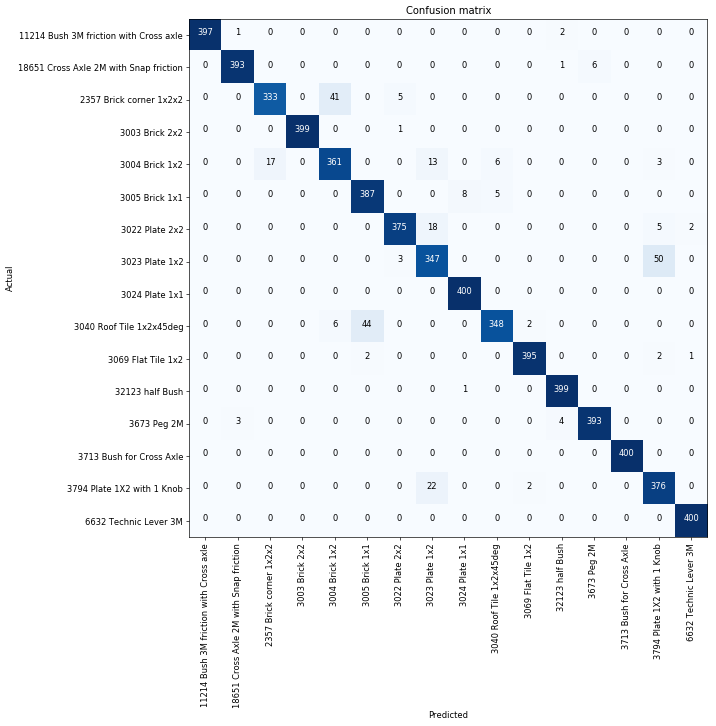

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
interp.most_confused(min_val=2)

[('3023 Plate 1x2', '3794 Plate 1X2 with 1 Knob', 50),
 ('3040 Roof Tile 1x2x45deg', '3005 Brick 1x1', 44),
 ('2357 Brick corner 1x2x2', '3004 Brick 1x2', 41),
 ('3794 Plate 1X2 with 1 Knob', '3023 Plate 1x2', 22),
 ('3022 Plate 2x2', '3023 Plate 1x2', 18),
 ('3004 Brick 1x2', '2357 Brick corner 1x2x2', 17),
 ('3004 Brick 1x2', '3023 Plate 1x2', 13),
 ('3005 Brick 1x1', '3024 Plate 1x1', 8),
 ('18651 Cross Axle 2M with Snap friction', '3673 Peg 2M', 6),
 ('3004 Brick 1x2', '3040 Roof Tile 1x2x45deg', 6),
 ('3040 Roof Tile 1x2x45deg', '3004 Brick 1x2', 6),
 ('2357 Brick corner 1x2x2', '3022 Plate 2x2', 5),
 ('3005 Brick 1x1', '3040 Roof Tile 1x2x45deg', 5),
 ('3022 Plate 2x2', '3794 Plate 1X2 with 1 Knob', 5),
 ('3673 Peg 2M', '32123 half Bush', 4),
 ('3004 Brick 1x2', '3794 Plate 1X2 with 1 Knob', 3),
 ('3023 Plate 1x2', '3022 Plate 2x2', 3),
 ('3673 Peg 2M', '18651 Cross Axle 2M with Snap friction', 3)]

In [25]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.317838,0.126466,0.050948


In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


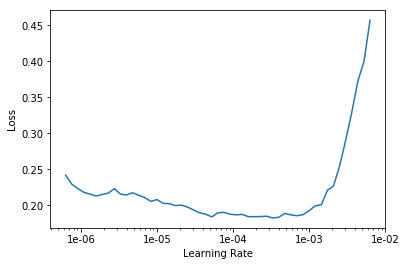

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.154806,0.070817,0.024298
2,0.128379,0.060956,0.019909


In [30]:
interp = ClassificationInterpretation.from_learner(learn)

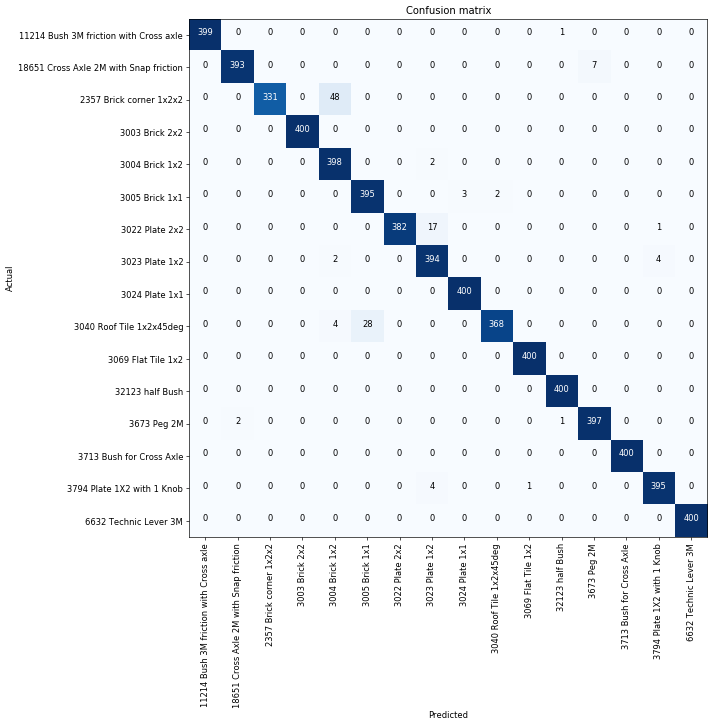

In [31]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)